# Code Lab 1

### Dataset `readme.txt`

(formatted slightly nicer for sanity)

**Captions, Dataset Splits, and Human Annotations**

* `Flickr8k.token.txt` - the raw captions of the Flickr8k Dataset . The first column is the ID of the caption which is `image address # caption number`
* `Flickr8k.lemma.txt` - the lemmatized version of the above captions 
* `Flickr_8k.trainImages.txt` - The training images used in our experiments
* `Flickr_8k.devImages.txt` - The development/validation images used in our experiments
* `Flickr_8k.testImages.txt` - The test images used in our experiments


**`ExpertAnnotations.txt` is the expert judgments**

* The first two columns are the image and caption IDs.
* Caption IDs are `<image file name>#<0-4>`.
* The next three columns are the expert judgments for that image-caption pair.
* Scores range from 1 to 4, with a 1 indicating that the caption does not describe the image at all, a 2 indicating the caption describes minor aspects of the image but does not describe the image, a 3 indicating that the caption almost describes the image with minor mistakes, and a 4 indicating that the caption describes the image.


**`CrowdFlowerAnnotations.txt` contains the CrowdFlower judgments**

* The first two columns are the image and caption IDs.
* The third column is the percent of Yes, the fourth column is the total number of Yes, the fifth column is the total number of No.
* A Yes means that the caption describes the image (possibly with minor mistakes), while a No means that the caption does not describe the image.
* Each image-caption pair has a minimum of three judgments, but some may have more.

```
If you use this corpus / data:
Please cite: M. Hodosh, P. Young and J. Hockenmaier (2013) "Framing Image Description as a Ranking Task: Data, Models and Evaluation Metrics", Journal of Artifical Intellegence Research, Volume 47, pages 853-899
http://www.jair.org/papers/paper3994.html
```

In [1]:
# helper function

def print_long_list(long_list):
    midpoint = int(len(long_list)/2)
    print(long_list[0])
    print(long_list[1])
    print("...")
    print(long_list[midpoint-1])
    print(long_list[midpoint])
    print("...")
    print(long_list[-2])
    print(long_list[-1], "; total =", len(long_list))

## Part 1: Load Images

In [2]:
# if you had the images you would load them this way
# however, today we're going to twist things a little
# to make you only download the image on demand!

"""
import glob

IMAGES_DIR = "./flickr8k/images"
image_paths = glob.glob(IMAGES_DIR+"/*.jpg")
image_paths.sort()
print_long_list(image_paths)
"""

./flickr8k/images/1000268201_693b08cb0e.jpg
./flickr8k/images/1001773457_577c3a7d70.jpg
...
./flickr8k/images/3106223494_52d4d2d75d.jpg
./flickr8k/images/3106340185_80d0cb770a.jpg
...
./flickr8k/images/997338199_7343367d7f.jpg
./flickr8k/images/997722733_0cb5439472.jpg ; total = 8091


## Part 2: Load Annotations and Captions

Part A: Loading Annotations

In [3]:
import csv

def load_good_expert_annotations(FILE_PATH):
    output = []
    with open(FILE_PATH, 'r') as f:
        annotations = csv.reader(f, delimiter='\t')
        for row in annotations:
            scores = [int(row[2]), int(row[3]), int(row[4])]
            if min(scores)>2:
                output.append(row[:2])
    return output


def load_good_crowd_annotations(FILE_PATH, threshold=0.8):
    output = []
    with open(FILE_PATH, 'r') as f:
        annotations = csv.reader(f, delimiter='\t')
        for row in annotations:
            score = float(row[2])
            if score>threshold:
                output.append(row[:2])
    return output

In [4]:
expert_ann = load_good_expert_annotations("./flickr8k/captions/ExpertAnnotations.txt")
print_long_list(expert_ann)

['1107246521_d16a476380.jpg', '3582742297_1daa29968e.jpg#2']
['1119015538_e8e796281e.jpg', '229862312_1a0ba19dab.jpg#2']
...
['3085667865_fa001816be.jpg', '3631986552_944ea208fc.jpg#2']
['309687244_4bdf3b591f.jpg', '197107117_4b438b1872.jpg#2']
...
['925491651_57df3a5b36.jpg', '925491651_57df3a5b36.jpg#2']
['997722733_0cb5439472.jpg', '486917990_72bd4069af.jpg#2'] ; total = 593


In [5]:
crowd_ann = load_good_crowd_annotations("./flickr8k/captions/CrowdFlowerAnnotations.txt")
print_long_list(crowd_ann)

['1056338697_4f7d7ce270.jpg', '1056338697_4f7d7ce270.jpg#2']
['1056338697_4f7d7ce270.jpg', '524105255_b346f288be.jpg#2']
...
['3080056515_3013830309.jpg', '3080056515_3013830309.jpg#2']
['308487515_7852928f90.jpg', '308487515_7852928f90.jpg#2']
...
['968081289_cdba83ce2e.jpg', '968081289_cdba83ce2e.jpg#2']
['997722733_0cb5439472.jpg', '872622575_ba1d3632cc.jpg#2'] ; total = 1323


Part B: Loading Captions

In [6]:
def load_captions_to_list(FILE_PATH):
    output = []
    for line in open(FILE_PATH, 'r'):
        line = line.split("\t")
        image, caption = line[0], line[1].rstrip('\n').lower()
        output.append([image, caption])
    return output

In [7]:
captions_list = load_captions_to_list("./flickr8k/captions/Flickr8k.token.txt")
print_long_list(captions_list)

['1000268201_693b08cb0e.jpg#0', 'a child in a pink dress is climbing up a set of stairs in an entry way .']
['1000268201_693b08cb0e.jpg#1', 'a girl going into a wooden building .']
...
['3106223494_52d4d2d75d.jpg#4', 'guy in santa suit wearing ninja mask and horns']
['3106340185_80d0cb770a.jpg#0', 'a man takes a picture out a window .']
...
['997722733_0cb5439472.jpg#3', 'a rock climber in a red shirt .']
['997722733_0cb5439472.jpg#4', 'a rock climber practices on a rock climbing wall .'] ; total = 40460


In [8]:
import random

def list_to_dict(list_):
    output = {}
    for item in list_:
        output[item[0]] = item[1]
    return output

def get_random_key(dictionary):
    total_num = len(dictionary.keys())
    rand_num = random.randint(0, total_num)
    rand_key = list(dictionary.keys())[rand_num]
    return rand_key

def print_rand_example(dictionary):
    rand_key = get_random_key(dictionary)
    rand_caption = dictionary[rand_key]
    print("Image:  ", rand_key.split("#")[0])
    print("Caption:", rand_caption)

In [9]:
captions = list_to_dict(captions_list)
print_rand_example(captions)

Image:   956164675_9ee084364e.jpg
Caption: a runner with one green shoe and one white shoe runs uphill .


## Part 3: Display Images and Captions

In [10]:
from requests import get
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def download_image_file(image_id, output_path):
    BASE_URL = "https://tlkh.design/downloads/flickr8k/images/"
    
    with open(output_path, "wb") as file:
        response = get(BASE_URL+image_id)
        file.write(response.content)
        
    return output_path

def display_rand_image(key):
    plt.style.use('ggplot')
    
    OUTPUT_FOLDER = "./flickr8k/images/"
    
    image_id = key.split("#")[0]
    image_path = download_image_file(image_id, OUTPUT_FOLDER+image_id)
    
    possible_caption_key = [image_id+"#"+str(i) for i in range(5)]
    
    label = ""
    
    for key in possible_caption_key:
        try:
            caption = captions[key]
            label += "\n"+caption
        except Exception as e:
            print(e)
            
    image = mpimg.imread(image_path)
    plt.grid(False)
    plt.imshow(image)
    x, y = int(image.shape[1]*1.1), int(image.shape[0]*0.5)
    plt.text(x, y, label, verticalalignment='top')
    plt.show()

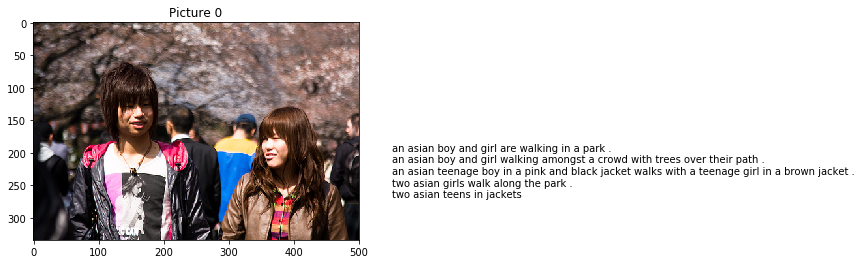

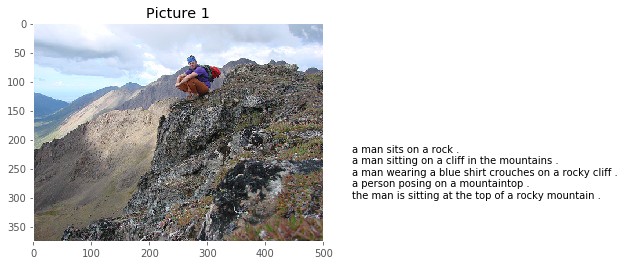

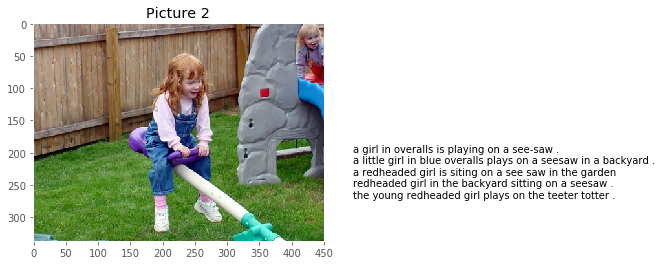

In [11]:
for i in range(3):
    plt.figure(i)
    plt.title("Picture "+str(i))
    display_rand_image(get_random_key(captions))
    print("\n")

In [12]:
def plot_distribution(data):
    plt.style.use('ggplot')
    
    # distribution of text lengths
    lengths = np.array([len(row[1].split(" ")) for row in data])
    summary = "mean: "+str(int(np.mean(lengths)))+" , min/max: "+str(np.min(lengths))+"/"+str(np.max(lengths))+" (95%: "+ str(round(np.percentile(lengths, 95), 2)) + ")"
    plt.figure(1, figsize=(10,6))
    plt.hist(lengths, bins='auto')
    plt.title("Distribution of text lengths")
    plt.xlabel("Text Length: " + summary); plt.ylabel("Examples")
    plt.axvline(np.mean(lengths), ls="-", color="k")
    plt.axvline(np.percentile(lengths, 95), ls="--", color="k")
    plt.show()

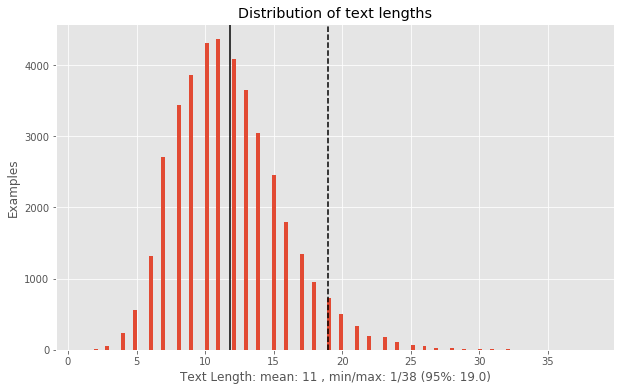

In [13]:
plot_distribution(captions_list)